In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import csv

In [2]:
cadence=26
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*cadence) for i in t_list_years]
run=50
cluster_size=2000
steps=7800

# 50 stars

## make an array of just the observational times

In [3]:
burst50=np.load('/home/lee/data/cluster_size_change/40x_burst/burst50_40x.npy')
L50=np.load('/home/lee/data/cluster_size_change/40x_burst/L50_40x.npy')
C50=np.load('/home/lee/data/cluster_size_change/40x_burst/C50_40x.npy')

In [4]:
cluster_size50=50
cad_L50=np.zeros((run,cluster_size50,12))
for i in range(run):
    for j in range(cluster_size50):
        for k in range(len(t_list_cadence)):
            cad_L50[i,j,k]=L50[i,j,t_list_cadence[k]]

## Figure out if a star is undergoing a burst and replace the last 30 years

In [102]:
obs_burst50=np.zeros((run,cluster_size50,12))
for i in range(run):
    for k in range(cluster_size50):
        for j in range(1,12):
            if j==1:
                if cad_L50[i,k,j]-cad_L50[i,k,j-1]==4:
                    obs_burst50[i,k,j-1]=1
                elif cad_L50[i,k,j-1]-cad_L50[i,k,j]==4:
                    if cad_L50[i,k,j]!=cad_L50[i,k,j+1]:
                        obs_burst50[i,k,j]=1
                    elif cad_L50[i,k,j]==cad_L50[i,k,j+1]:
                        obs_burst50[i,k,j:j+2]=1
            else:
                if cad_L50[i,k,j]-cad_L50[i,k,j-1]==4:
                    obs_burst50[i,k,j-6:j]=1 
                    obs_burst50[i,k,0]=0
                elif cad_L50[i,k,j-1]-cad_L50[i,k,j]==4:
                    obs_burst50[i,k,j:j+6]=1
                    print(i,k)

0 39
0 43
0 47
1 7
1 17
1 18
1 38
2 44
3 4
3 5
3 12
3 21
4 1
4 6
4 10
4 44
4 47
5 30
5 36
5 38
5 40
6 21
6 29
6 47
9 17
9 42
10 7
10 12
12 6
12 14
12 25
12 30
12 43
13 36
13 44
13 48
15 4
16 12
16 20
17 26
17 31
18 11
18 17
18 33
18 40
19 23
20 1
20 20
20 23
20 26
20 39
25 42
26 18
26 20
26 33
29 28
29 41
31 41
32 3
32 4
32 5
32 19
32 30
33 0
33 21
34 18
34 26
34 45
35 40
35 48
36 24
36 43
36 47
37 9
38 1
38 27
40 3
41 24
42 1
42 17
42 19
42 23
42 30
44 38
44 39
45 0
45 39
46 13
47 19
47 45
48 0
49 22
49 23
49 48


In [103]:
print(cad_L50[0,39,:])

[-2.8699633 -2.8699633 -2.8699633 -6.8699633 -6.8699633 -6.8699633
 -6.8699633 -6.8699633 -6.8699633 -2.8699633 -2.8699633 -2.8699633]


In [104]:
print(obs_burst50[0,39,:])

[0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]


## count the number of zeros and ones

In [105]:
num40_50=0
list40_50=[]
num0_50=0
list0_50=[]

for i in range(run):
    for k in range(cluster_size50):
        for j in range(0,12):
            if obs_burst50[i,k,j]==1:
                num40_50+=1
            elif obs_burst50[i,k,j]==0:
                num0_50+=1
    list40_50.append(num40_50)
    num40_50=0
    list0_50.append(num0_50)
    num0_50=0

## convert it to mass

In [106]:
mass40_50=[]
mass0_50=[]
for i in range(run):
    mass40_50.append(list40_50[i]*40)
    mass0_50.append(list0_50[i]*1)

## find fraction

In [107]:
frac40_50=[]
frac0_50=[]
for i in range(run):
    total50=mass40_50[i]+mass0_50[i]
    frac40_50.append(100*mass40_50[i]/total50)
    frac0_50.append(100*mass0_50[i]/total50)

## plot it

/tmp/ipykernel_86324/3452957469.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


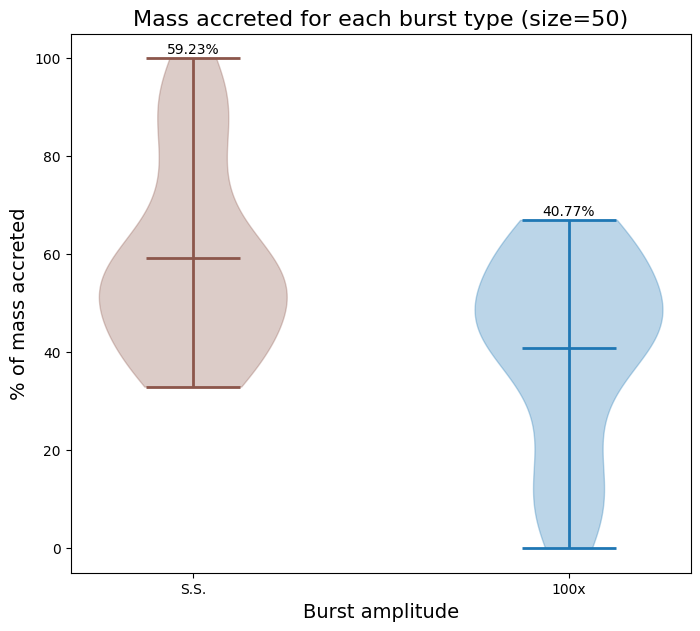

In [108]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac40_50,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_50,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_50))
string40='{:.2f}%'.format(np.mean(frac40_50))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_50)+1,string0,ha='center')
ax1.text(2,np.max(frac40_50)+1,string40,ha='center')
plt.title('Mass accreted for each burst type (size=50)',fontsize=16)
plt.show()    

# 100 stars

## make an array of just observational times

In [19]:
burst100=np.load('/home/lee/data/cluster_size_change/40x_burst/burst100_40x.npy')
L100=np.load('/home/lee/data/cluster_size_change/40x_burst/L100_40x.npy')
C100=np.load('/home/lee/data/cluster_size_change/40x_burst/C100_40x.npy')

In [20]:
cluster_size100=100
cad_L100=np.zeros((run,cluster_size100,12))
for i in range(run):
    for j in range(cluster_size100):
        for k in range(len(t_list_cadence)):
            cad_L100[i,j,k]=L100[i,j,t_list_cadence[k]]

## Figure out if a star is undergoing a burst and replace the last 30 years

In [109]:
obs_burst100=np.zeros((run,cluster_size100,12))
for i in range(run):
    for k in range(cluster_size100):
        for j in range(1,12):
            if j==1:
                if cad_L100[i,k,j]-cad_L100[i,k,j-1]==4:
                    obs_burst100[i,k,j-1]=1
                elif cad_L100[i,k,j-1]-cad_L100[i,k,j]==4:
                    if cad_L100[i,k,j]!=cad_L100[i,k,j+1]:
                        obs_burst100[i,k,j]=1
                    elif cad_L100[i,k,j]==cad_L100[i,k,j+1]:
                        obs_burst100[i,k,j:j+2]=1
            else:
                if cad_L100[i,k,j]-cad_L100[i,k,j-1]==4:
                    obs_burst100[i,k,j-6:j]=1 
                    obs_burst100[i,k,0]=0
                elif cad_L100[i,k,j-1]-cad_L100[i,k,j]==4:
                    obs_burst100[i,k,j:j+6]=1
                    print(i,k)

0 4
0 16
0 40
0 58
0 74
1 6
1 33
1 96
2 25
2 26
2 34
2 55
2 56
2 80
2 86
2 90
3 3
3 99
4 26
4 45
4 46
4 94
5 29
5 42
5 43
5 71
6 38
6 45
7 13
7 15
7 79
8 1
8 42
8 84
9 46
9 56
9 77
9 87
9 97
10 70
11 1
11 8
11 35
11 39
11 50
11 58
11 80
11 87
12 10
12 78
12 87
12 93
13 91
14 0
14 44
14 89
15 5
15 65
15 70
16 51
16 52
17 5
17 33
17 59
18 7
18 10
18 42
18 54
18 69
18 79
18 91
19 19
19 36
19 48
19 82
19 94
21 49
22 19
22 31
22 49
22 84
22 90
23 47
24 47
24 62
24 83
24 97
25 1
25 19
25 47
25 57
25 97
26 6
26 18
26 23
26 42
26 58
26 66
26 98
27 36
27 41
27 81
28 8
28 26
28 48
28 84
28 92
29 14
29 43
29 73
30 17
30 47
30 50
30 52
30 79
31 1
31 30
31 34
31 93
32 3
32 8
32 53
32 66
33 28
33 87
34 25
34 47
34 52
34 55
34 57
34 58
34 60
35 49
36 53
36 66
36 67
36 75
36 97
37 11
37 35
37 53
37 54
37 87
38 64
38 66
39 4
39 17
40 25
40 34
40 40
40 76
41 65
41 81
42 5
42 12
42 58
42 70
42 79
42 98
43 58
43 67
43 71
43 75
43 83
44 27
44 75
44 89
45 13
45 26
45 73
45 80
45 81
45 87
46 9
46 29
46 69
46

## count the number of zeros and ones

In [110]:
num40_100=0
list40_100=[]
num0_100=0
list0_100=[]

for i in range(run):
    for k in range(cluster_size100):
        for j in range(0,12):
            if obs_burst100[i,k,j]==1:
                num40_100+=1
            elif obs_burst100[i,k,j]==0:
                num0_100+=1
    list40_100.append(num40_100)
    num40_100=0
    list0_100.append(num0_100)
    num0_100=0

## convert to mass

In [111]:
mass40_100=[]
mass0_100=[]
for i in range(run):
    mass40_100.append(list40_100[i]*40)
    mass0_100.append(list0_100[i]*1)

## find fraction

In [112]:
frac40_100=[]
frac0_100=[]
for i in range(run):
    total100=mass40_100[i]+mass0_100[i]
    frac40_100.append(100*mass40_100[i]/total100)
    frac0_100.append(100*mass0_100[i]/total100)

## plot it

/tmp/ipykernel_86324/1374488212.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


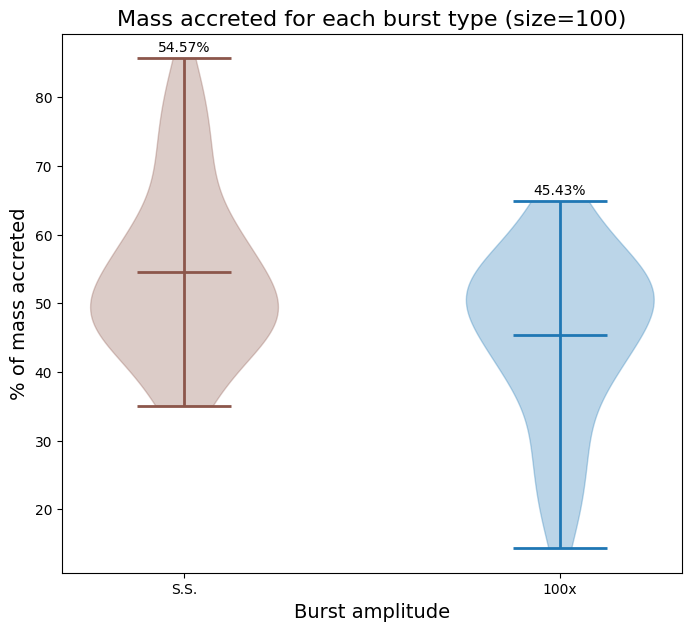

In [113]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac40_100,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_100,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_100))
string40='{:.2f}%'.format(np.mean(frac40_100))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_100)+1,string0,ha='center')
ax1.text(2,np.max(frac40_100)+1,string40,ha='center')
plt.title('Mass accreted for each burst type (size=100)',fontsize=16)
plt.show()    

# 500 stars

## make an array of observational times

In [114]:
burst500=np.load('/home/lee/data/cluster_size_change/40x_burst/burst500_40x.npy')
L500=np.load('/home/lee/data/cluster_size_change/40x_burst/L500_40x.npy')
C500=np.load('/home/lee/data/cluster_size_change/40x_burst/C500_40x.npy')

In [115]:
cluster_size500=500
cad_L500=np.zeros((run,cluster_size500,12))
for i in range(run):
    for j in range(cluster_size500):
        for k in range(len(t_list_cadence)):
            cad_L500[i,j,k]=L500[i,j,t_list_cadence[k]]

In [116]:
print(cad_L500[0,1,:])

[1.01761607 1.01761607 1.01761607 1.01761607 1.01761607 1.01761607
 1.01761607 1.01761607 1.01761607 1.01761607 1.01761607 1.01761607]


## Figure out if a star is undergoing a burst and replace the last 30 years

In [119]:
obs_burst500=np.zeros((run,cluster_size500,12))
for i in range(run):
    for k in range(cluster_size500):
        for j in range(1,12):
            if j==1:
                if cad_L500[i,k,j]-cad_L500[i,k,j-1]==4:
                    obs_burst500[i,k,j-1]=1
                elif cad_L500[i,k,j-1]-cad_L500[i,k,j]==4:
                    if cad_L500[i,k,j]!=cad_L500[i,k,j+1]:
                        obs_burst500[i,k,j]=1
                    elif cad_L500[i,k,j]==cad_L500[i,k,j+1]:
                        obs_burst500[i,k,j:j+2]=1
            else:
                if cad_L500[i,k,j]-cad_L500[i,k,j-1]==4:
                    obs_burst500[i,k,j-6:j]=1 
                    obs_burst500[i,k,0]=0
                elif cad_L500[i,k,j-1]-cad_L500[i,k,j]==4:
                    obs_burst500[i,k,j:j+6]=1
                    print(i,k)

0 6
0 14
0 28
0 59
0 69
0 90
0 101
0 132
0 142
0 154
0 186
0 198
0 221
0 245
0 251
0 328
0 348
0 363
0 383
0 402
0 438
0 446
1 41
1 70
1 113
1 120
1 148
1 156
1 180
1 189
1 210
1 248
1 265
1 310
1 312
1 333
1 365
1 424
1 436
1 437
1 449
1 457
1 471
1 487
1 498
2 61
2 103
2 209
2 241
2 244
2 245
2 279
2 283
2 331
2 362
2 402
2 443
2 489
3 73
3 190
3 321
3 331
3 336
3 340
3 346
3 372
3 381
3 396
3 401
3 405
3 432
4 29
4 106
4 116
4 117
4 128
4 136
4 208
4 227
4 257
4 395
4 425
4 441
4 450
4 453
5 45
5 150
5 234
5 246
5 261
5 281
5 333
5 338
5 374
5 382
5 421
5 432
6 4
6 75
6 81
6 143
6 159
6 175
6 193
6 204
6 223
6 249
6 252
6 310
6 339
6 349
6 376
6 381
6 439
6 458
6 462
7 16
7 57
7 109
7 111
7 151
7 188
7 250
7 255
7 267
7 281
7 291
7 292
7 306
7 375
7 413
7 465
8 21
8 28
8 86
8 186
8 200
8 272
8 282
8 306
8 362
8 367
8 377
8 389
8 407
8 452
8 480
8 483
9 26
9 40
9 98
9 108
9 136
9 146
9 146
9 152
9 180
9 201
9 257
9 304
9 343
9 352
9 388
9 401
9 431
10 23
10 37
10 85
10 99
10 153
10 2

In [120]:
print(obs_burst500[0,1,:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## count number of zeros and ones

In [121]:
num40_500=0
list40_500=[]
num0_500=0
list0_500=[]

for i in range(run):
    for k in range(cluster_size500):
        for j in range(0,12):
            if obs_burst500[i,k,j]==1:
                num40_500+=1
            elif obs_burst500[i,k,j]==0:
                num0_500+=1
    list40_500.append(num40_500)
    num40_500=0
    list0_500.append(num0_500)
    num0_500=0

## convert to mass

In [122]:
mass40_500=[]
mass0_500=[]
for i in range(run):
    mass40_500.append(list40_500[i]*40)
    mass0_500.append(list0_500[i]*1)

## find fraction

In [123]:
frac40_500=[]
frac0_500=[]
for i in range(run):
    total500=mass40_500[i]+mass0_500[i]
    frac40_500.append(100*mass40_500[i]/total500)
    frac0_500.append(100*mass0_500[i]/total500)

## plot it

/tmp/ipykernel_86324/716555856.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


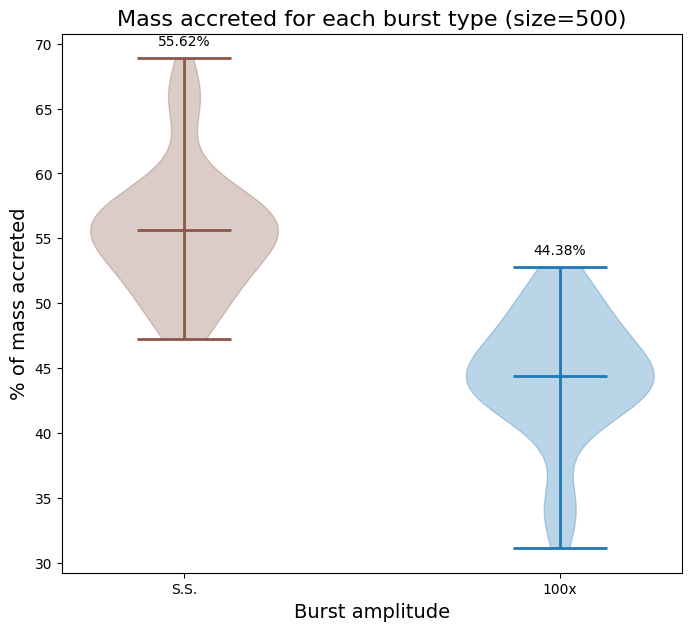

In [124]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac40_500,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_500,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_500))
string40='{:.2f}%'.format(np.mean(frac40_500))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_500)+1,string0,ha='center')
ax1.text(2,np.max(frac40_500)+1,string40,ha='center')
plt.title('Mass accreted for each burst type (size=500)',fontsize=16)
plt.show()  

# 1000 stars

## make an array of observational times

In [125]:
burst1000=np.load('/home/lee/data/cluster_size_change/40x_burst/burst1000_40x.npy')
L1000=np.load('/home/lee/data/cluster_size_change/40x_burst/L1000_40x.npy')
C1000=np.load('/home/lee/data/cluster_size_change/40x_burst/C1000_40x.npy')

In [126]:
cluster_size1000=1000
cad_L1000=np.zeros((run,cluster_size1000,12))
for i in range(run):
    for j in range(cluster_size1000):
        for k in range(len(t_list_cadence)):
            cad_L1000[i,j,k]=L1000[i,j,t_list_cadence[k]]

In [127]:
print(cad_L1000[0,128,:])

[0.53383131 0.53383131 0.53383131 0.53383131 0.53383131 0.53383131
 0.53383131 0.53383131 0.53383131 0.53383131 0.53383131 0.53383131]


## Figure out if a star is undergoing a burst and replace the last 30 years

In [128]:
obs_burst1000=np.zeros((run,cluster_size1000,12))
for i in range(run):
    for k in range(cluster_size1000):
        for j in range(1,12):
            if j==1:
                if cad_L1000[i,k,j]-cad_L1000[i,k,j-1]==4:
                    obs_burst1000[i,k,j-1]=1
                elif cad_L1000[i,k,j-1]-cad_L1000[i,k,j]==4:
                    if cad_L1000[i,k,j]!=cad_L1000[i,k,j+1]:
                        obs_burst1000[i,k,j]=1
                    elif cad_L1000[i,k,j]==cad_L1000[i,k,j+1]:
                        obs_burst1000[i,k,j:j+2]=1
            else:
                if cad_L1000[i,k,j]-cad_L1000[i,k,j-1]==4:
                    obs_burst1000[i,k,j-6:j]=1 
                    obs_burst1000[i,k,0]=0
                elif cad_L1000[i,k,j-1]-cad_L1000[i,k,j]==4:
                    obs_burst1000[i,k,j:j+6]=1
                    print(i,k)

0 6
0 66
0 97
0 113
0 116
0 140
0 186
0 194
0 223
0 242
0 294
0 296
0 308
0 309
0 449
0 459
0 463
0 519
0 589
0 622
0 630
0 662
0 711
0 742
0 745
0 758
0 759
0 777
0 848
0 857
0 867
0 908
0 935
0 968
0 998
1 13
1 41
1 65
1 107
1 151
1 168
1 232
1 246
1 271
1 282
1 283
1 350
1 376
1 385
1 397
1 484
1 491
1 562
1 567
1 671
1 753
1 784
1 812
1 842
1 848
1 939
1 993
2 53
2 79
2 90
2 97
2 133
2 139
2 165
2 205
2 285
2 293
2 345
2 384
2 416
2 425
2 440
2 443
2 456
2 468
2 485
2 502
2 538
2 556
2 560
2 594
2 597
2 623
2 632
2 636
2 668
2 735
2 762
2 808
2 835
2 850
2 858
2 892
2 923
2 933
2 960
2 971
2 974
2 999
3 4
3 19
3 23
3 36
3 73
3 78
3 160
3 167
3 176
3 183
3 215
3 277
3 326
3 348
3 365
3 415
3 478
3 539
3 591
3 616
3 655
3 660
3 669
3 696
3 706
3 776
3 784
3 791
3 801
3 803
3 880
3 934
3 955
3 960
4 46
4 59
4 78
4 129
4 132
4 184
4 221
4 241
4 242
4 247
4 266
4 266
4 355
4 389
4 448
4 545
4 547
4 590
4 592
4 684
4 720
4 759
4 774
4 775
4 788
4 816
4 825
4 878
4 880
4 892
4 959
4 963
4

## count number of zeros and ones

In [129]:
num40_1000=0
list40_1000=[]
num0_1000=0
list0_1000=[]

for i in range(run):
    for k in range(cluster_size1000):
        for j in range(0,12):
            if obs_burst1000[i,k,j]==1:
                num40_1000+=1
            elif obs_burst1000[i,k,j]==0:
                num0_1000+=1
    list40_1000.append(num40_1000)
    num40_1000=0
    list0_1000.append(num0_1000)
    num0_1000=0

## convert to mass

In [130]:
mass40_1000=[]
mass0_1000=[]
for i in range(run):
    mass40_1000.append(list40_1000[i]*40)
    mass0_1000.append(list0_1000[i]*1)

## find fraction

In [131]:
frac40_1000=[]
frac0_1000=[]
for i in range(run):
    total1000=mass40_1000[i]+mass0_1000[i]
    frac40_1000.append(100*mass40_1000[i]/total1000)
    frac0_1000.append(100*mass0_1000[i]/total1000)

## plot it

/tmp/ipykernel_86324/1471236119.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


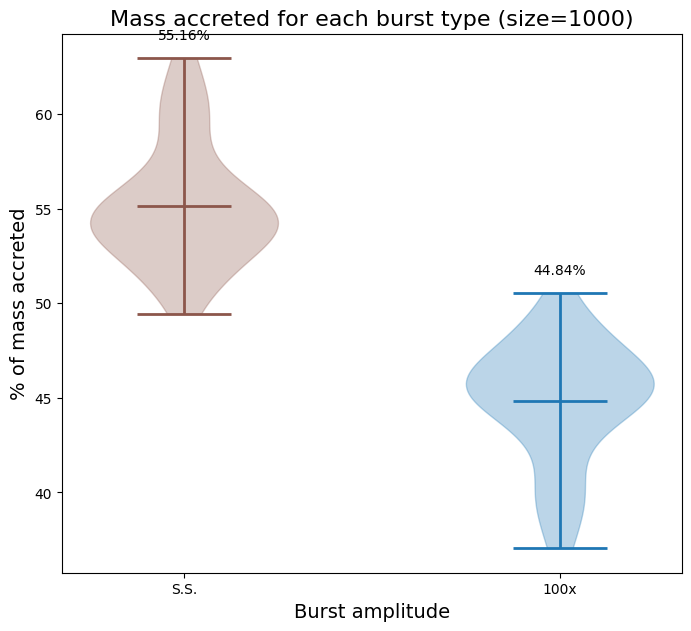

In [132]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac40_1000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_1000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_1000))
string40='{:.2f}%'.format(np.mean(frac40_1000))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_1000)+1,string0,ha='center')
ax1.text(2,np.max(frac40_1000)+1,string40,ha='center')
plt.title('Mass accreted for each burst type (size=1000)',fontsize=16)
plt.show()    

# 2000 stars

## make an array of observational times

In [133]:
burst2000=np.load('/home/lee/data/cluster_size_change/40x_burst/burst2000_40x.npy')
L2000=np.load('/home/lee/data/cluster_size_change/40x_burst/L2000_40x.npy')
C2000=np.load('/home/lee/data/cluster_size_change/40x_burst/C2000_40x.npy')

In [134]:
cluster_size2000=2000
cad_L2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for j in range(cluster_size2000):
        for k in range(len(t_list_cadence)):
            cad_L2000[i,j,k]=L2000[i,j,t_list_cadence[k]]

## figure out if a star is undergoing a burst and replace the last 30 years

In [135]:
obs_burst2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if j==1:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==4:
                    obs_burst2000[i,k,j-1]=1
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==4:
                    if cad_L2000[i,k,j]!=cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j]=1
                    elif cad_L2000[i,k,j]==cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j:j+2]=1
            else:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==4:
                    obs_burst2000[i,k,j-6:j]=1 
                    obs_burst2000[i,k,0]=0
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==4:
                    obs_burst2000[i,k,j:j+6]=1
                    print(i,k)

0 5
0 22
0 24
0 81
0 140
0 187
0 211
0 217
0 238
0 249
0 283
0 293
0 314
0 341
0 410
0 425
0 427
0 442
0 465
0 467
0 510
0 546
0 550
0 601
0 673
0 696
0 721
0 743
0 756
0 815
0 852
0 884
0 916
0 940
0 980
0 981
0 1118
0 1124
0 1172
0 1193
0 1239
0 1254
0 1257
0 1313
0 1323
0 1345
0 1379
0 1390
0 1496
0 1525
0 1587
0 1593
0 1606
0 1646
0 1653
0 1655
0 1682
0 1749
0 1749
0 1764
0 1783
0 1803
0 1808
0 1820
0 1900
0 1906
0 1908
1 28
1 37
1 127
1 154
1 167
1 196
1 225
1 239
1 282
1 301
1 319
1 361
1 368
1 382
1 447
1 470
1 486
1 488
1 560
1 634
1 647
1 650
1 651
1 660
1 689
1 698
1 710
1 738
1 807
1 848
1 864
1 910
1 944
1 990
1 993
1 1013
1 1045
1 1048
1 1076
1 1098
1 1141
1 1172
1 1194
1 1238
1 1275
1 1299
1 1305
1 1325
1 1333
1 1348
1 1363
1 1384
1 1400
1 1408
1 1505
1 1547
1 1635
1 1639
1 1683
1 1717
1 1731
1 1746
1 1807
1 1820
1 1833
1 1863
1 1893
1 1905
1 1906
1 1943
1 1946
1 1974
2 27
2 91
2 125
2 220
2 224
2 225
2 247
2 258
2 377
2 386
2 434
2 435
2 447
2 460
2 475
2 551
2 571
2 577

## count number of zeros and ones

In [136]:
num40_2000=0
list40_2000=[]
num0_2000=0
list0_2000=[]

for i in range(run):
    for k in range(cluster_size2000):
        for j in range(0,12):
            if obs_burst2000[i,k,j]==1:
                num40_2000+=1
            elif obs_burst2000[i,k,j]==0:
                num0_2000+=1
    list40_2000.append(num40_2000)
    num40_2000=0
    list0_2000.append(num0_2000)
    num0_2000=0

## convert to mass

In [137]:
mass40_2000=[]
mass0_2000=[]
for i in range(run):
    mass40_2000.append(list40_2000[i]*40)
    mass0_2000.append(list0_2000[i]*1)

## find fraction

In [138]:
frac40_2000=[]
frac0_2000=[]
for i in range(run):
    total2000=mass40_2000[i]+mass0_2000[i]
    frac40_2000.append(100*mass40_2000[i]/total2000)
    frac0_2000.append(100*mass0_2000[i]/total2000)

## plot it

/tmp/ipykernel_86324/2660096401.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


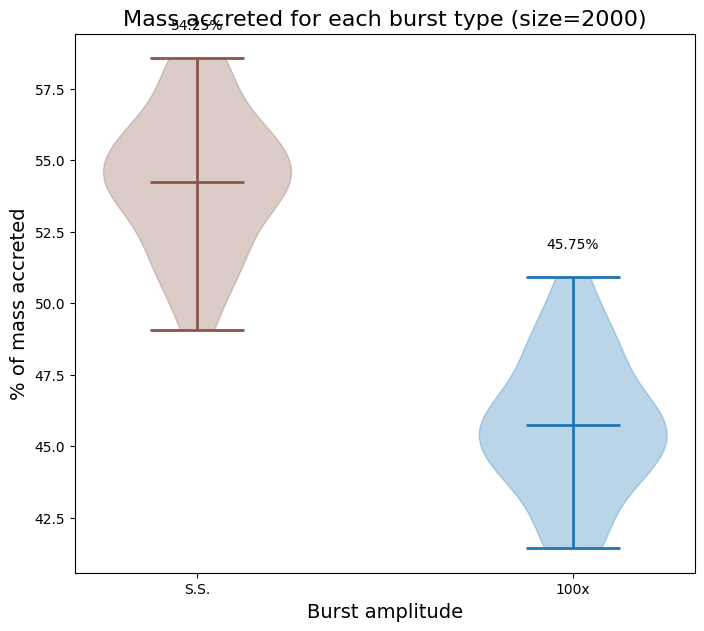

In [139]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac40_2000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_2000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_2000))
string40='{:.2f}%'.format(np.mean(frac40_2000))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_2000)+1,string0,ha='center')
ax1.text(2,np.max(frac40_2000)+1,string40,ha='center')
plt.title('Mass accreted for each burst type (size=2000)',fontsize=16)
plt.show()    

# 5000 stars

## make an array of observational times

In [140]:
burst5000=np.load('/home/lee/data/cluster_size_change/40x_burst/burst5000_40x.npy')
L5000=np.load('/home/lee/data/cluster_size_change/40x_burst/L5000_40x.npy')
C5000=np.load('/home/lee/data/cluster_size_change/40x_burst/C5000_40x.npy')

In [141]:
cluster_size5000=5000
cad_L5000=np.zeros((run,cluster_size5000,12))
for i in range(run):
    for j in range(cluster_size5000):
        for k in range(len(t_list_cadence)):
            cad_L5000[i,j,k]=L5000[i,j,t_list_cadence[k]]

## figure out if a star is undergoing a burst and replace the last 30 years

In [142]:
obs_burst5000=np.zeros((run,cluster_size5000,12))
for i in range(run):
    for k in range(cluster_size5000):
        for j in range(1,12):
            if j==1:
                if cad_L5000[i,k,j]-cad_L5000[i,k,j-1]==4:
                    obs_burst5000[i,k,j-1]=1
                elif cad_L5000[i,k,j-1]-cad_L5000[i,k,j]==4:
                    if cad_L5000[i,k,j]!=cad_L5000[i,k,j+1]:
                        obs_burst5000[i,k,j]=1
                    elif cad_L5000[i,k,j]==cad_L5000[i,k,j+1]:
                        obs_burst5000[i,k,j:j+2]=1
            else:
                if cad_L5000[i,k,j]-cad_L5000[i,k,j-1]==4:
                    obs_burst5000[i,k,j-6:j]=1 
                    obs_burst5000[i,k,0]=0
                elif cad_L5000[i,k,j-1]-cad_L5000[i,k,j]==4:
                    obs_burst5000[i,k,j:j+6]=1
                    print(i,k)

0 39
0 49
0 136
0 142
0 152
0 161
0 179
0 201
0 225
0 238
0 247
0 345
0 350
0 367
0 368
0 378
0 392
0 411
0 419
0 446
0 457
0 479
0 513
0 521
0 571
0 587
0 604
0 607
0 611
0 662
0 666
0 758
0 759
0 788
0 810
0 843
0 862
0 904
0 941
0 949
0 984
0 988
0 999
0 1036
0 1165
0 1179
0 1185
0 1197
0 1205
0 1268
0 1300
0 1352
0 1459
0 1460
0 1483
0 1532
0 1601
0 1618
0 1627
0 1671
0 1715
0 1758
0 1775
0 1789
0 1794
0 1826
0 1852
0 1887
0 1909
0 1915
0 1940
0 1944
0 2000
0 2012
0 2037
0 2047
0 2061
0 2084
0 2106
0 2141
0 2152
0 2189
0 2215
0 2228
0 2266
0 2344
0 2358
0 2383
0 2389
0 2488
0 2489
0 2541
0 2545
0 2581
0 2611
0 2616
0 2632
0 2643
0 2707
0 2718
0 2779
0 2795
0 2799
0 2826
0 2827
0 2836
0 2864
0 2872
0 2889
0 2893
0 2899
0 2917
0 2921
0 2959
0 2975
0 2979
0 3011
0 3076
0 3096
0 3129
0 3163
0 3186
0 3250
0 3263
0 3289
0 3353
0 3377
0 3397
0 3444
0 3494
0 3512
0 3544
0 3574
0 3598
0 3634
0 3636
0 3644
0 3656
0 3687
0 3693
0 3735
0 3740
0 3743
0 3749
0 3757
0 3781
0 3791
0 3804
0 3871
0 

## count number of zeros and ones

In [143]:
num40_5000=0
list40_5000=[]
num0_5000=0
list0_5000=[]

for i in range(run):
    for k in range(cluster_size5000):
        for j in range(0,12):
            if obs_burst5000[i,k,j]==1:
                num40_5000+=1
            elif obs_burst5000[i,k,j]==0:
                num0_5000+=1
    list40_5000.append(num40_5000)
    num40_5000=0
    list0_5000.append(num0_5000)
    num0_5000=0

## convert to mass

In [144]:
mass40_5000=[]
mass0_5000=[]
for i in range(run):
    mass40_5000.append(list40_5000[i]*40)
    mass0_5000.append(list0_5000[i]*1)

## find fraction

In [145]:
frac40_5000=[]
frac0_5000=[]
for i in range(run):
    total5000=mass40_5000[i]+mass0_5000[i]
    frac40_5000.append(100*mass40_5000[i]/total5000)
    frac0_5000.append(100*mass0_5000[i]/total5000)

## plot it

/tmp/ipykernel_86324/1110357112.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


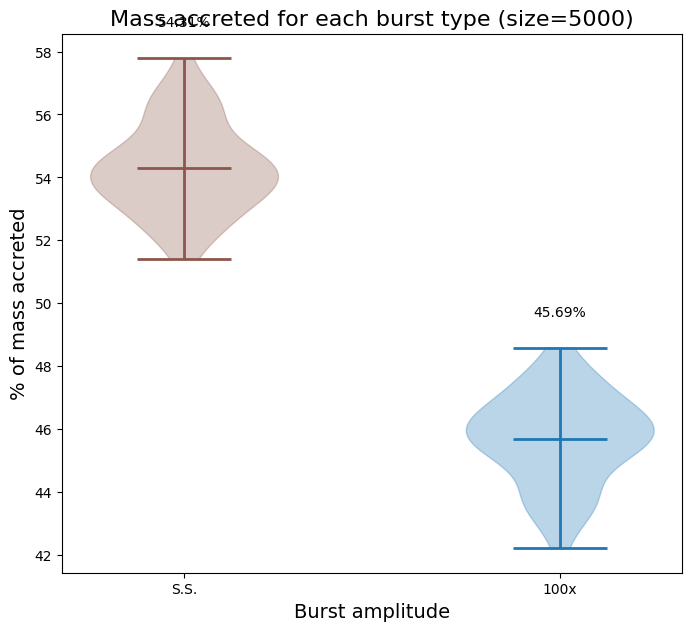

In [146]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac40_5000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_5000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_5000))
string40='{:.2f}%'.format(np.mean(frac40_5000))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_5000)+1,string0,ha='center')
ax1.text(2,np.max(frac40_5000)+1,string40,ha='center')
plt.title('Mass accreted for each burst type (size=5000)',fontsize=16)
plt.show()    

In [147]:
#means and std
mean50=np.mean(frac40_50)
std50=np.std(frac40_50)
mean100=np.mean(frac40_100)
std100=np.std(frac40_100)
mean500=np.mean(frac40_500)
std500=np.std(frac40_500)
mean1000=np.mean(frac40_1000)
std1000=np.std(frac40_1000)
mean2000=np.mean(frac40_2000)
std2000=np.std(frac40_2000)
mean5000=np.mean(frac40_5000)
std5000=np.std(frac40_5000)

/tmp/ipykernel_86324/974329505.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','50','100','500','1000','2000','5000'])


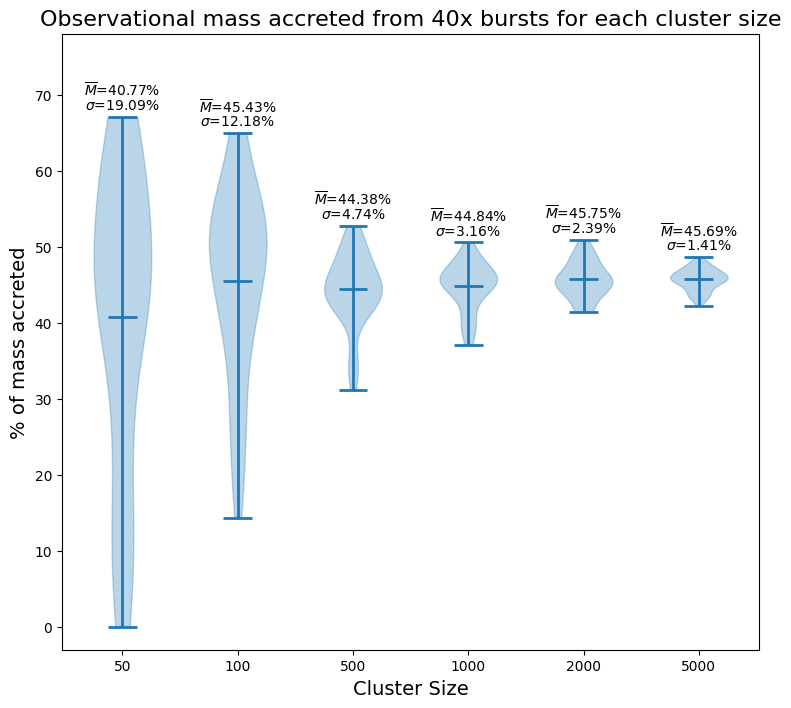

In [148]:
fig,ax1=plt.subplots()
fig.set_size_inches(9,8)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac40_50,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac40_100,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 

v0=ax1.violinplot(frac40_500,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
v0=ax1.violinplot(frac40_1000,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
v0=ax1.violinplot(frac40_2000,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
v0=ax1.violinplot(frac40_5000,positions=[6],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Cluster Size',fontsize=14)
    
string50mean='{:.2f}%'.format(mean50)
string50std='{:.2f}%'.format(std50)
string100mean='{:.2f}%'.format(mean100)
string100std='{:.2f}%'.format(std100)
string500mean='{:.2f}%'.format(mean500)
string500std='{:.2f}%'.format(std500)
string1000mean='{:.2f}%'.format(mean1000)
string1000std='{:.2f}%'.format(std1000)
string2000mean='{:.2f}%'.format(mean2000)
string2000std='{:.2f}%'.format(std2000)
string5000mean='{:.2f}%'.format(mean5000)
string5000std='{:.2f}%'.format(std5000)

#ax1.locator_params(axis='x',nbins=2)
ax1.set_ylim(-3,78)
ax1.text(1,np.max(frac40_50)+2.75,'$\overline{M}$='+string50mean,ha='center')
ax1.text(1,np.max(frac40_50)+1,'$\sigma$='+string50std,ha='center')
ax1.text(2,np.max(frac40_100)+2.75,'$\overline{M}$='+string100mean,ha='center')
ax1.text(2,np.max(frac40_100)+1,'$\sigma$='+string100std,ha='center')
ax1.text(3,np.max(frac40_500)+2.75,'$\overline{M}$='+string500mean,ha='center')
ax1.text(3,np.max(frac40_500)+1,'$\sigma$='+string500std,ha='center')
ax1.text(4,np.max(frac40_1000)+2.75,'$\overline{M}$='+string1000mean,ha='center')
ax1.text(4,np.max(frac40_1000)+1,'$\sigma$='+string1000std,ha='center')
ax1.text(5,np.max(frac40_2000)+2.75,'$\overline{M}$='+string2000mean,ha='center')
ax1.text(5,np.max(frac40_2000)+1,'$\sigma$='+string2000std,ha='center')
ax1.text(6,np.max(frac40_5000)+2.75,'$\overline{M}$='+string5000mean,ha='center')
ax1.text(6,np.max(frac40_5000)+1,'$\sigma$='+string5000std,ha='center')


plt.title('Observational mass accreted from 40x bursts for each cluster size',fontsize=16)
plt.savefig('/home/lee/research/figs/observational/observational_mass_size_change_violinplot40x.jpeg',dpi=300,bbox_inches='tight')
plt.show()  